# Pima Indians Diabetes In Python

## Table Content
1. Introduction
2. Installing Libraries
3. Importing Data
4. Clean Data
5. Calculate Minimum, Maximum, Median, Average, Standard deviation and Variance
6. Draw Distribution
7. Draw Histogram
8. Normalize Data
9. Correlation With ‫‪Confusion‬‬ ‫‪Matrix
10. Draw Scatter Plot

## Introduction
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat.

## Dataset
The dataset contains below features and labels:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

## Installing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from fitter import Fitter, get_common_distributions

## Importing Data

In [2]:
# Read File Function
def read_file(name):
    data = pd.read_excel(name)
    return data

# Write And Save New Data On Excel
def re_write_file(data):
    data.to_excel('new-release.xlsx')
    
# Read File And Save On Data
data = read_file("pima-indians-diabetes.v1.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      766 non-null    float64
 1   A2      766 non-null    object 
 2   A3      767 non-null    float64
 3   A4      767 non-null    float64
 4   A5      765 non-null    object 
 5   A6      762 non-null    object 
 6   A7      764 non-null    float64
 7   A8      767 non-null    float64
 8   output  766 non-null    float64
dtypes: float64(6), object(3)
memory usage: 54.2+ KB


## Clean Data

### Remove Missing Values

Next, i will cleanup the dataset which is the important part of data science. Missing data can lead to wrong statistics during modeling and predictions.

In [4]:
data.dropna(inplace=True)

### Remove Wrong Data Formats

In [5]:
for i in data.index:
    try:
        data.loc[i] = pd.to_numeric(data.loc[i])
    except:
        data.drop(i, inplace=True)
        
re_write_file(data)
data = read_file("new-release.xlsx")
data.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
733    763
734    764
735    765
736    766
737    767
Name: Unnamed: 0, Length: 738, dtype: int64

### Remove Duplicated Items


In [6]:
data.drop_duplicates(inplace=True)

### Remove Outlier Data

In [7]:
for col in data:
    # Computing IQR
    Q1 = data[col].describe()[4]
    Q3 = data[col].describe()[6]
    IQR = data[col].describe()[5]
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    for row in data.index:
        item = data.loc[row][col]
        if item < lower or item > upper:
            data.drop(row, inplace=True)

### Remove Wrong Data

In [8]:
for x in data.index:
    if data.loc[x, "output"] > 1 or data.loc[x, "output"] < 0:
        data.drop(x, inplace=True)

    if data.loc[x, "A4"] == 0 or data.loc[x, "A2"] == 0 or data.loc[x, "A3"] == 0 or data.loc[x, "A5"] == 0:
        data.drop(x, inplace=True)
        
data = data.reset_index(drop=True)
data

,A1,A2,A3,A4,A5,A6,A7,A8,output
0,1,89,66,23,94,28.1,0.167,21,0
1,3,78,50,32,88,31.0,0.248,26,1
2,5,166,72,19,175,25.8,0.587,51,1
3,1,103,30,38,83,43.3,0.183,33,0
4,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
244,1,121,78,39,74,39.0,0.261,28,0
245,1,128,88,39,110,36.5,1.057,37,1
246,2,88,58,26,16,28.4,0.766,22,0
247,10,101,76,48,180,32.9,0.171,63,0


## Calculate Minimum, Maximum, Median, Average, Standard deviation and Variance

In [9]:
res = []
for column in data:
    row = {
        "minimum": data[column].min(),
        "maximum": data[column].max(),
        "median": data[column].median(),
        "average": data[column].mean(),
        "standard-deviation": data[column].std(),
        "variance": data[column].var()
    }
    res.append(row)

resDf = pd.DataFrame(res, index=[col for col in data])
resDf

,minimum,maximum,median,average,standard-deviation,variance
A1,0.000,10.000,2.000,2.755020,2.570032,6.605065
A2,56.000,195.000,107.000,111.843373,26.154233,684.043918
A3,24.000,110.000,70.000,69.008032,12.471578,155.540258
A4,10.000,60.000,27.000,27.726908,10.526355,110.804152
A5,15.000,180.000,94.000,97.819277,41.873122,1753.358337
A6,18.200,67.100,31.600,31.922088,6.951882,48.328663
A7,0.085,1.096,0.412,0.441948,0.228017,0.051992
A8,21.000,81.000,26.000,28.779116,8.736938,76.334078
output,0.000,1.000,0.000,0.216867,0.412942,0.170521


## Draw Distribution

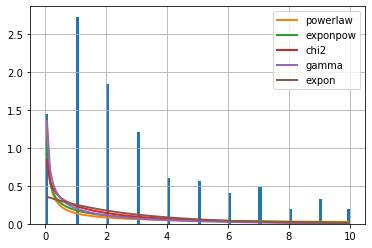

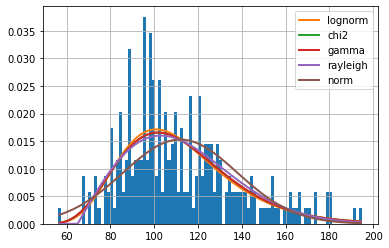

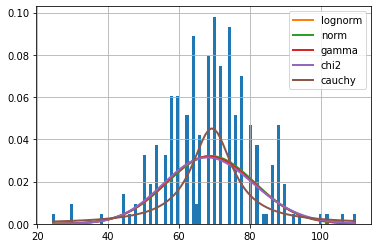

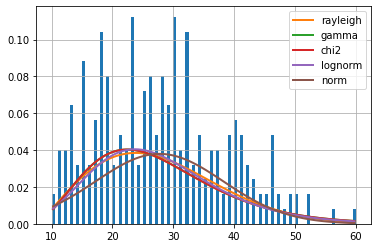

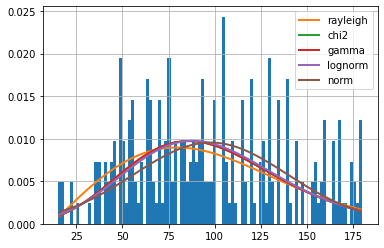

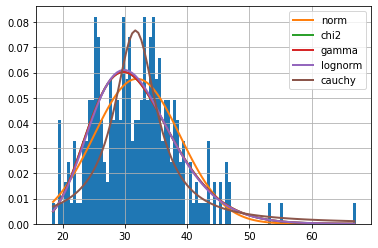

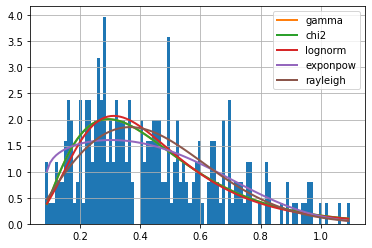

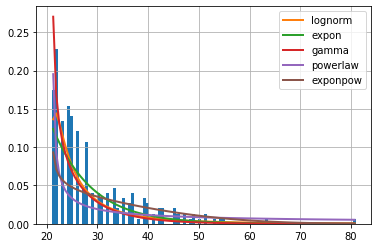

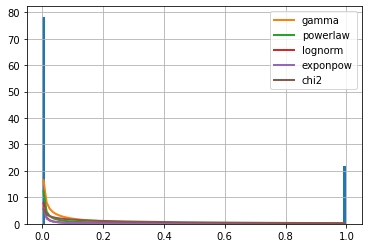

In [10]:
for col in data:
    distribut = Fitter(data[col], distributions=get_common_distributions())
    distribut.fit()
    distribut.summary()
    plt.show()

## Draw Histogram

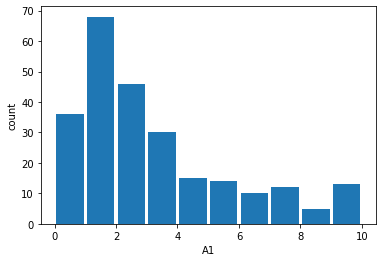

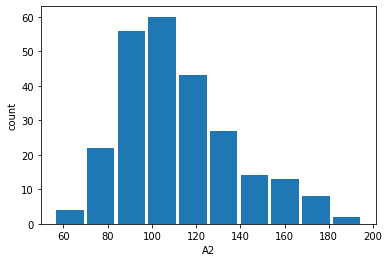

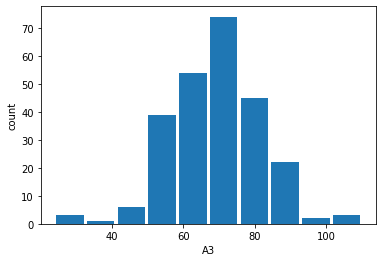

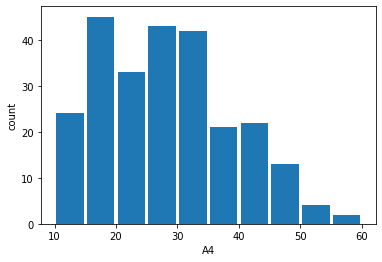

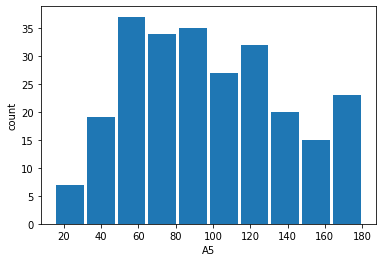

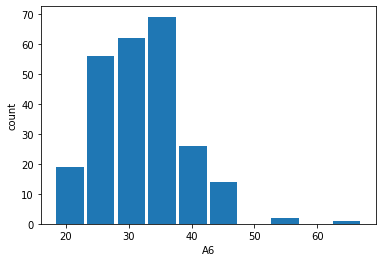

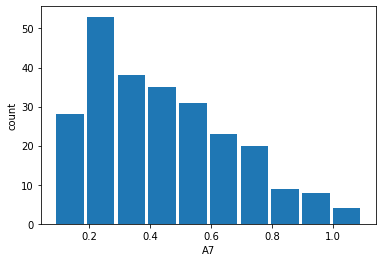

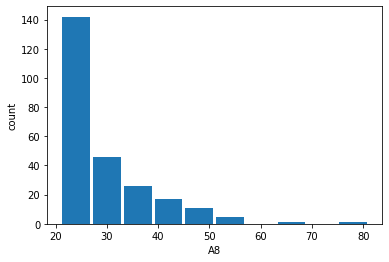

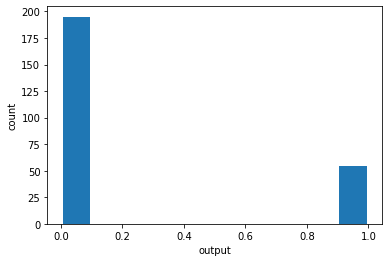

In [11]:
for column in data:
    plt.hist(data[column], rwidth=0.9)
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

## Normalize Data

In [12]:
normalized_df = (data-data.min())/(data.max()-data.min())
res = []
for column in normalized_df:
    row = {
        "minimum": normalized_df[column].min(),
        "maximum": normalized_df[column].max(),
        "median": normalized_df[column].median(),
        "average": normalized_df[column].mean(),
        "standard-deviation": normalized_df[column].std(),
        "variance": normalized_df[column].var()
    }
    res.append(row)

normalized_result = pd.DataFrame(res, index=[col for col in data])
normalized_result

,minimum,maximum,median,average,standard-deviation,variance
A1,0.0,1.0,0.200000,0.275502,0.257003,0.066051
A2,0.0,1.0,0.366906,0.401751,0.188160,0.035404
A3,0.0,1.0,0.534884,0.523349,0.145018,0.021030
A4,0.0,1.0,0.340000,0.354538,0.210527,0.044322
A5,0.0,1.0,0.478788,0.501935,0.253776,0.064403
A6,0.0,1.0,0.274029,0.280615,0.142165,0.020211
A7,0.0,1.0,0.323442,0.353064,0.225536,0.050866
A8,0.0,1.0,0.083333,0.129652,0.145616,0.021204
output,0.0,1.0,0.000000,0.216867,0.412942,0.170521


## Correlation with ‫‪Confusion‬‬ ‫‪matrix

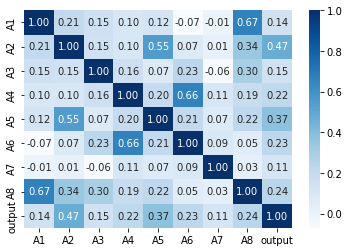

In [13]:
sn.heatmap(data.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

## Draw Scatter Plot

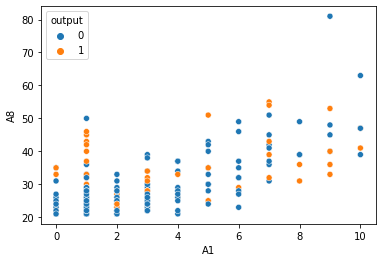

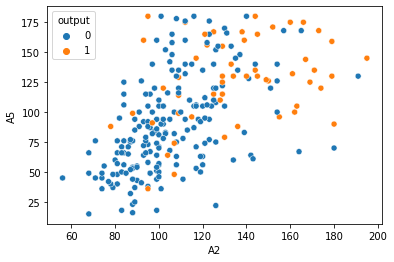

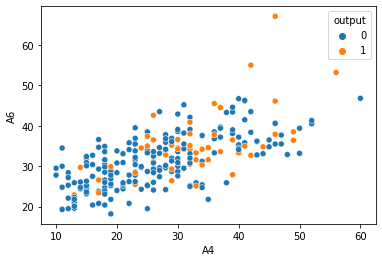

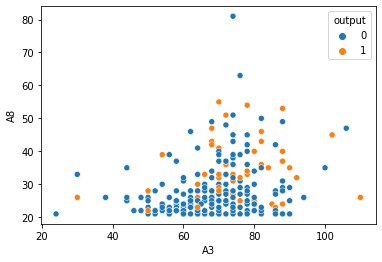

In [14]:
plt.clf()
sn.scatterplot(data=data, x="A1", y="A8", hue="output")
plt.show()

plt.clf()
sn.scatterplot(data=data, x="A2", y="A5", hue="output")
plt.show()

plt.clf()
sn.scatterplot(data=data, x="A4", y="A6", hue="output")
plt.show()

plt.clf()
sn.scatterplot(data=data, x="A3", y="A8", hue="output")
plt.show()